In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import axes_dict, plot_some, plot_history
from csbdeep.utils.tf import limit_gpu_memory
from csbdeep.io import load_training_data
from csbdeep.models import Config, CARE

Using TensorFlow backend.


In [2]:
# limit_gpu_memory(fraction=1/2)

In [3]:
(X,Y), (X_val,Y_val), axes = load_training_data('C:/Users\Spencer Du/Documents/MSc Computing with placement Cardiff Uni/Placement/Machine learning for imaging project/Data/my_training_data.npz', validation_split=0.1, verbose=True)

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

number of training images:	 922
number of validation images:	 102
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1


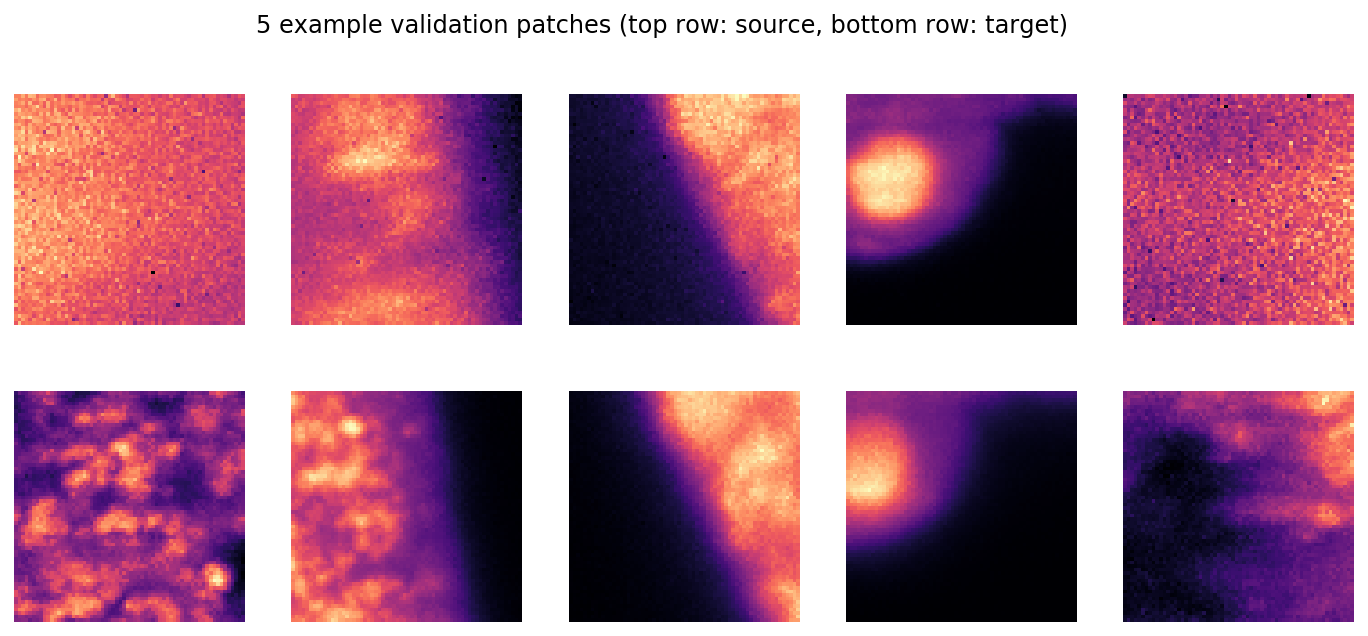

In [4]:
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');

In [5]:
config = Config(axes, n_channel_in, n_channel_out, train_steps_per_epoch=10)
print(config)
vars(config)

Config(axes='ZYXC', n_channel_in=1, n_channel_out=1, n_dim=3, probabilistic=False, train_batch_size=16, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_epochs=100, train_learning_rate=0.0004, train_loss='mae', train_reduce_lr={'factor': 0.5, 'patience': 10, 'min_delta': 0}, train_steps_per_epoch=10, train_tensorboard=True, unet_input_shape=(None, None, None, 1), unet_kern_size=3, unet_last_activation='linear', unet_n_depth=2, unet_n_first=32, unet_residual=True)


{'n_dim': 3,
 'axes': 'ZYXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'train_checkpoint': 'weights_best.h5',
 'train_checkpoint_last': 'weights_last.h5',
 'train_checkpoint_epoch': 'weights_now.h5',
 'probabilistic': False,
 'unet_residual': True,
 'unet_n_depth': 2,
 'unet_kern_size': 3,
 'unet_n_first': 32,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, None, 1),
 'train_loss': 'mae',
 'train_epochs': 100,
 'train_steps_per_epoch': 10,
 'train_learning_rate': 0.0004,
 'train_batch_size': 16,
 'train_tensorboard': True,
 'train_reduce_lr': {'factor': 0.5, 'patience': 10, 'min_delta': 0}}

In [6]:
model = CARE(config, 'my_model', basedir='models')

C:\ProgramData\Anaconda3\lib\site-packages\csbdeep\models\base_model.py:134: UserWarning: output path for model already exists, files may be overwritten: C:\Users\Spencer Du\Documents\MSc Computing with placement Cardiff Uni\Placement\Machine learning for imaging project\models\my_model
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
history = model.train(X,Y, validation_data=(X_val,Y_val))


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Epoch 1/100
10/10 [==============================] - ETA: 2:51 - loss: 0.2593 - mse: 0.1173 - mae: 0.259 - ETA: 2:30 - loss: 0.2363 - mse: 0.1031 - mae: 0.236 - ETA: 2:12 - loss: 0.2198 - mse: 0.0900 - mae: 0.219 - ETA: 1:55 - loss: 0.2369 - mse: 0.1044 - mae: 0.236 - ETA: 1:35 - loss: 0.2433 - mse: 0.1139 - mae: 0.243 - ETA: 1:16 - loss: 0.2466 - mse: 0.1141 - mae: 0.246 - ETA: 57s - loss: 0.2426 - mse: 0.1107 - mae: 0.242 - ETA: 37s - loss: 0.2476 - mse: 0.1157 - mae: 0.24 - ETA: 18s - loss: 0.2521 - mse: 0.1197 - mae: 0.25 - 203s 20s/step - loss: 0.2533 - mse: 0.1202 - mae: 0.2533 - val_loss: 0.2439 - val_mse: 0.1119 - va

10/10 [==============================] - ETA: 2:53 - loss: 0.1565 - mse: 0.0483 - mae: 0.156 - ETA: 2:32 - loss: 0.1966 - mse: 0.0679 - mae: 0.196 - ETA: 2:12 - loss: 0.1882 - mse: 0.0607 - mae: 0.188 - ETA: 1:54 - loss: 0.1858 - mse: 0.0594 - mae: 0.185 - ETA: 1:35 - loss: 0.1847 - mse: 0.0611 - mae: 0.184 - ETA: 1:16 - loss: 0.1922 - mse: 0.0673 - mae: 0.192 - ETA: 57s - loss: 0.1842 - mse: 0.0628 - mae: 0.184 - ETA: 38s - loss: 0.1854 - mse: 0.0635 - mae: 0.18 - ETA: 19s - loss: 0.1850 - mse: 0.0640 - mae: 0.18 - 205s 21s/step - loss: 0.1890 - mse: 0.0668 - mae: 0.1890 - val_loss: 0.1611 - val_mse: 0.0533 - val_mae: 0.1611
Epoch 12/100
10/10 [==============================] - ETA: 2:55 - loss: 0.1406 - mse: 0.0393 - mae: 0.140 - ETA: 2:34 - loss: 0.1558 - mse: 0.0508 - mae: 0.155 - ETA: 2:14 - loss: 0.1621 - mse: 0.0552 - mae: 0.162 - ETA: 1:55 - loss: 0.1704 - mse: 0.0615 - mae: 0.170 - ETA: 1:38 - loss: 0.1754 - mse: 0.0634 - mae: 0.175 - ETA: 1:19 - loss: 0.1762 - mse: 0.0632 - m

10/10 [==============================] - ETA: 2:49 - loss: 0.1799 - mse: 0.0686 - mae: 0.179 - ETA: 2:29 - loss: 0.1682 - mse: 0.0650 - mae: 0.168 - ETA: 2:11 - loss: 0.1699 - mse: 0.0640 - mae: 0.169 - ETA: 1:52 - loss: 0.1658 - mse: 0.0601 - mae: 0.165 - ETA: 1:34 - loss: 0.1637 - mse: 0.0579 - mae: 0.163 - ETA: 1:15 - loss: 0.1702 - mse: 0.0601 - mae: 0.170 - ETA: 56s - loss: 0.1742 - mse: 0.0610 - mae: 0.174 - ETA: 37s - loss: 0.1702 - mse: 0.0579 - mae: 0.17 - ETA: 18s - loss: 0.1705 - mse: 0.0568 - mae: 0.17 - 202s 20s/step - loss: 0.1657 - mse: 0.0540 - mae: 0.1657 - val_loss: 0.1452 - val_mse: 0.0397 - val_mae: 0.1452
Epoch 24/100
10/10 [==============================] - ETA: 2:55 - loss: 0.1547 - mse: 0.0452 - mae: 0.154 - ETA: 2:34 - loss: 0.1588 - mse: 0.0479 - mae: 0.158 - ETA: 2:13 - loss: 0.1610 - mse: 0.0507 - mae: 0.161 - ETA: 1:54 - loss: 0.1532 - mse: 0.0461 - mae: 0.153 - ETA: 1:37 - loss: 0.1437 - mse: 0.0418 - mae: 0.143 - ETA: 1:18 - loss: 0.1426 - mse: 0.0414 - m

10/10 [==============================] - ETA: 2:52 - loss: 0.1257 - mse: 0.0290 - mae: 0.125 - ETA: 2:33 - loss: 0.1323 - mse: 0.0333 - mae: 0.132 - ETA: 2:15 - loss: 0.1409 - mse: 0.0379 - mae: 0.140 - ETA: 1:56 - loss: 0.1365 - mse: 0.0364 - mae: 0.136 - ETA: 1:36 - loss: 0.1404 - mse: 0.0386 - mae: 0.140 - ETA: 1:17 - loss: 0.1425 - mse: 0.0410 - mae: 0.142 - ETA: 58s - loss: 0.1427 - mse: 0.0415 - mae: 0.142 - ETA: 38s - loss: 0.1396 - mse: 0.0399 - mae: 0.13 - ETA: 19s - loss: 0.1434 - mse: 0.0422 - mae: 0.14 - 206s 21s/step - loss: 0.1448 - mse: 0.0427 - mae: 0.1448 - val_loss: 0.1382 - val_mse: 0.0379 - val_mae: 0.1382
Epoch 36/100
10/10 [==============================] - ETA: 2:53 - loss: 0.1143 - mse: 0.0235 - mae: 0.114 - ETA: 2:35 - loss: 0.1140 - mse: 0.0245 - mae: 0.114 - ETA: 2:15 - loss: 0.1205 - mse: 0.0272 - mae: 0.120 - ETA: 1:56 - loss: 0.1237 - mse: 0.0290 - mae: 0.123 - ETA: 1:36 - loss: 0.1290 - mse: 0.0312 - mae: 0.129 - ETA: 1:17 - loss: 0.1335 - mse: 0.0332 - m

10/10 [==============================] - ETA: 2:52 - loss: 0.1536 - mse: 0.0449 - mae: 0.153 - ETA: 2:33 - loss: 0.1432 - mse: 0.0377 - mae: 0.143 - ETA: 1:58 - loss: 0.1473 - mse: 0.0383 - mae: 0.146 - ETA: 1:44 - loss: 0.1440 - mse: 0.0362 - mae: 0.142 - ETA: 1:29 - loss: 0.1423 - mse: 0.0363 - mae: 0.141 - ETA: 1:12 - loss: 0.1484 - mse: 0.0409 - mae: 0.147 - ETA: 54s - loss: 0.1475 - mse: 0.0407 - mae: 0.147 - ETA: 36s - loss: 0.1460 - mse: 0.0398 - mae: 0.14 - ETA: 18s - loss: 0.1442 - mse: 0.0393 - mae: 0.14 - 201s 20s/step - loss: 0.1439 - mse: 0.0391 - mae: 0.1435 - val_loss: 0.1357 - val_mse: 0.0346 - val_mae: 0.1357
Epoch 48/100
10/10 [==============================] - ETA: 3:03 - loss: 0.1752 - mse: 0.0510 - mae: 0.175 - ETA: 2:45 - loss: 0.1509 - mse: 0.0411 - mae: 0.150 - ETA: 2:22 - loss: 0.1510 - mse: 0.0407 - mae: 0.151 - ETA: 2:00 - loss: 0.1419 - mse: 0.0370 - mae: 0.141 - ETA: 1:40 - loss: 0.1383 - mse: 0.0347 - mae: 0.138 - ETA: 1:19 - loss: 0.1383 - mse: 0.0353 - m

10/10 [==============================] - ETA: 2:52 - loss: 0.1450 - mse: 0.0347 - mae: 0.145 - ETA: 2:33 - loss: 0.1340 - mse: 0.0341 - mae: 0.134 - ETA: 2:14 - loss: 0.1369 - mse: 0.0356 - mae: 0.136 - ETA: 1:55 - loss: 0.1377 - mse: 0.0346 - mae: 0.137 - ETA: 1:35 - loss: 0.1383 - mse: 0.0341 - mae: 0.138 - ETA: 1:16 - loss: 0.1417 - mse: 0.0372 - mae: 0.141 - ETA: 57s - loss: 0.1377 - mse: 0.0355 - mae: 0.137 - ETA: 38s - loss: 0.1373 - mse: 0.0360 - mae: 0.13 - ETA: 19s - loss: 0.1358 - mse: 0.0359 - mae: 0.13 - 204s 20s/step - loss: 0.1387 - mse: 0.0374 - mae: 0.1387 - val_loss: 0.1297 - val_mse: 0.0329 - val_mae: 0.1297
Epoch 60/100
10/10 [==============================] - ETA: 2:56 - loss: 0.1534 - mse: 0.0444 - mae: 0.153 - ETA: 2:35 - loss: 0.1405 - mse: 0.0363 - mae: 0.140 - ETA: 2:15 - loss: 0.1302 - mse: 0.0313 - mae: 0.130 - ETA: 1:56 - loss: 0.1233 - mse: 0.0279 - mae: 0.123 - ETA: 1:36 - loss: 0.1247 - mse: 0.0279 - mae: 0.124 - ETA: 1:16 - loss: 0.1249 - mse: 0.0279 - m

10/10 [==============================] - ETA: 2:59 - loss: 0.1401 - mse: 0.0353 - mae: 0.140 - ETA: 2:36 - loss: 0.1360 - mse: 0.0357 - mae: 0.136 - ETA: 2:15 - loss: 0.1229 - mse: 0.0299 - mae: 0.122 - ETA: 1:56 - loss: 0.1272 - mse: 0.0316 - mae: 0.127 - ETA: 1:36 - loss: 0.1298 - mse: 0.0340 - mae: 0.129 - ETA: 1:17 - loss: 0.1311 - mse: 0.0345 - mae: 0.131 - ETA: 57s - loss: 0.1322 - mse: 0.0354 - mae: 0.132 - ETA: 38s - loss: 0.1305 - mse: 0.0344 - mae: 0.13 - ETA: 19s - loss: 0.1283 - mse: 0.0336 - mae: 0.12 - 203s 20s/step - loss: 0.1293 - mse: 0.0336 - mae: 0.1293 - val_loss: 0.1210 - val_mse: 0.0291 - val_mae: 0.1210
Epoch 72/100
10/10 [==============================] - ETA: 2:50 - loss: 0.1371 - mse: 0.0388 - mae: 0.137 - ETA: 2:30 - loss: 0.1286 - mse: 0.0346 - mae: 0.128 - ETA: 2:11 - loss: 0.1195 - mse: 0.0301 - mae: 0.119 - ETA: 1:54 - loss: 0.1195 - mse: 0.0300 - mae: 0.119 - ETA: 1:36 - loss: 0.1184 - mse: 0.0286 - mae: 0.118 - ETA: 1:17 - loss: 0.1201 - mse: 0.0291 - m

10/10 [==============================] - ETA: 2:48 - loss: 0.1350 - mse: 0.0337 - mae: 0.135 - ETA: 2:29 - loss: 0.1342 - mse: 0.0340 - mae: 0.134 - ETA: 2:10 - loss: 0.1311 - mse: 0.0322 - mae: 0.131 - ETA: 1:52 - loss: 0.1265 - mse: 0.0301 - mae: 0.126 - ETA: 1:33 - loss: 0.1321 - mse: 0.0338 - mae: 0.132 - ETA: 1:14 - loss: 0.1311 - mse: 0.0333 - mae: 0.131 - ETA: 55s - loss: 0.1272 - mse: 0.0323 - mae: 0.127 - ETA: 37s - loss: 0.1232 - mse: 0.0306 - mae: 0.12 - ETA: 18s - loss: 0.1221 - mse: 0.0302 - mae: 0.12 - 199s 20s/step - loss: 0.1189 - mse: 0.0291 - mae: 0.1189 - val_loss: 0.1173 - val_mse: 0.0290 - val_mae: 0.1173
Epoch 84/100
10/10 [==============================] - ETA: 2:49 - loss: 0.1482 - mse: 0.0450 - mae: 0.148 - ETA: 2:29 - loss: 0.1413 - mse: 0.0417 - mae: 0.141 - ETA: 2:10 - loss: 0.1381 - mse: 0.0394 - mae: 0.138 - ETA: 1:52 - loss: 0.1350 - mse: 0.0377 - mae: 0.135 - ETA: 1:33 - loss: 0.1305 - mse: 0.0352 - mae: 0.130 - ETA: 1:15 - loss: 0.1282 - mse: 0.0338 - m

10/10 [==============================] - ETA: 2:50 - loss: 0.1230 - mse: 0.0297 - mae: 0.123 - ETA: 2:30 - loss: 0.1186 - mse: 0.0296 - mae: 0.118 - ETA: 1:56 - loss: 0.1215 - mse: 0.0307 - mae: 0.120 - ETA: 1:45 - loss: 0.1240 - mse: 0.0330 - mae: 0.123 - ETA: 1:30 - loss: 0.1218 - mse: 0.0319 - mae: 0.121 - ETA: 1:13 - loss: 0.1218 - mse: 0.0314 - mae: 0.121 - ETA: 55s - loss: 0.1182 - mse: 0.0295 - mae: 0.117 - ETA: 37s - loss: 0.1156 - mse: 0.0278 - mae: 0.11 - ETA: 18s - loss: 0.1174 - mse: 0.0288 - mae: 0.11 - 202s 20s/step - loss: 0.1151 - mse: 0.0277 - mae: 0.1146 - val_loss: 0.1166 - val_mse: 0.0288 - val_mae: 0.1166
Epoch 96/100
10/10 [==============================] - ETA: 3:08 - loss: 0.1064 - mse: 0.0270 - mae: 0.106 - ETA: 2:41 - loss: 0.1039 - mse: 0.0244 - mae: 0.103 - ETA: 2:21 - loss: 0.1057 - mse: 0.0237 - mae: 0.105 - ETA: 2:01 - loss: 0.1115 - mse: 0.0262 - mae: 0.111 - ETA: 1:40 - loss: 0.1114 - mse: 0.0262 - mae: 0.111 - ETA: 1:19 - loss: 0.1084 - mse: 0.0251 - m

['loss', 'lr', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']


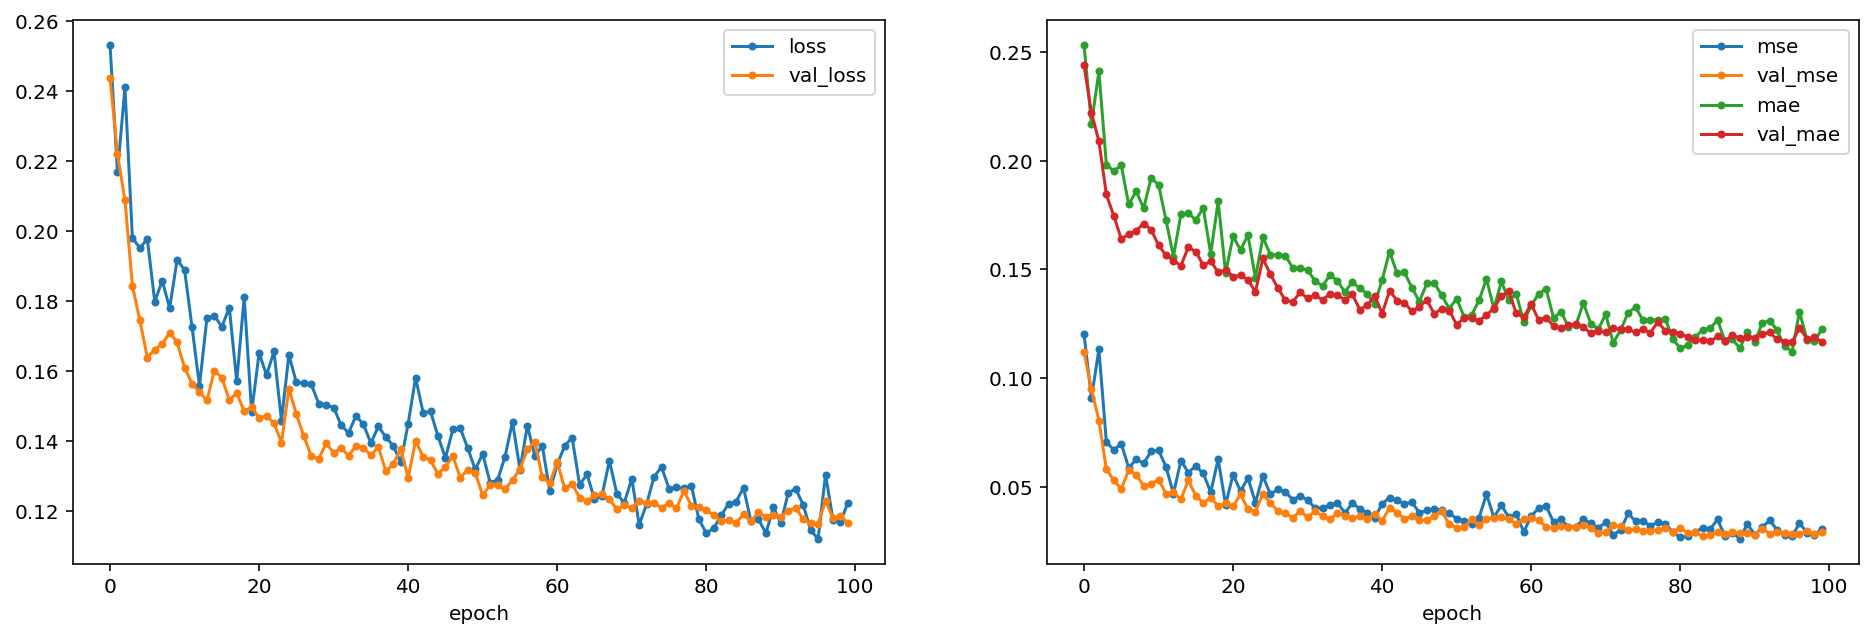

In [8]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss'],['mse','val_mse','mae','val_mae']);

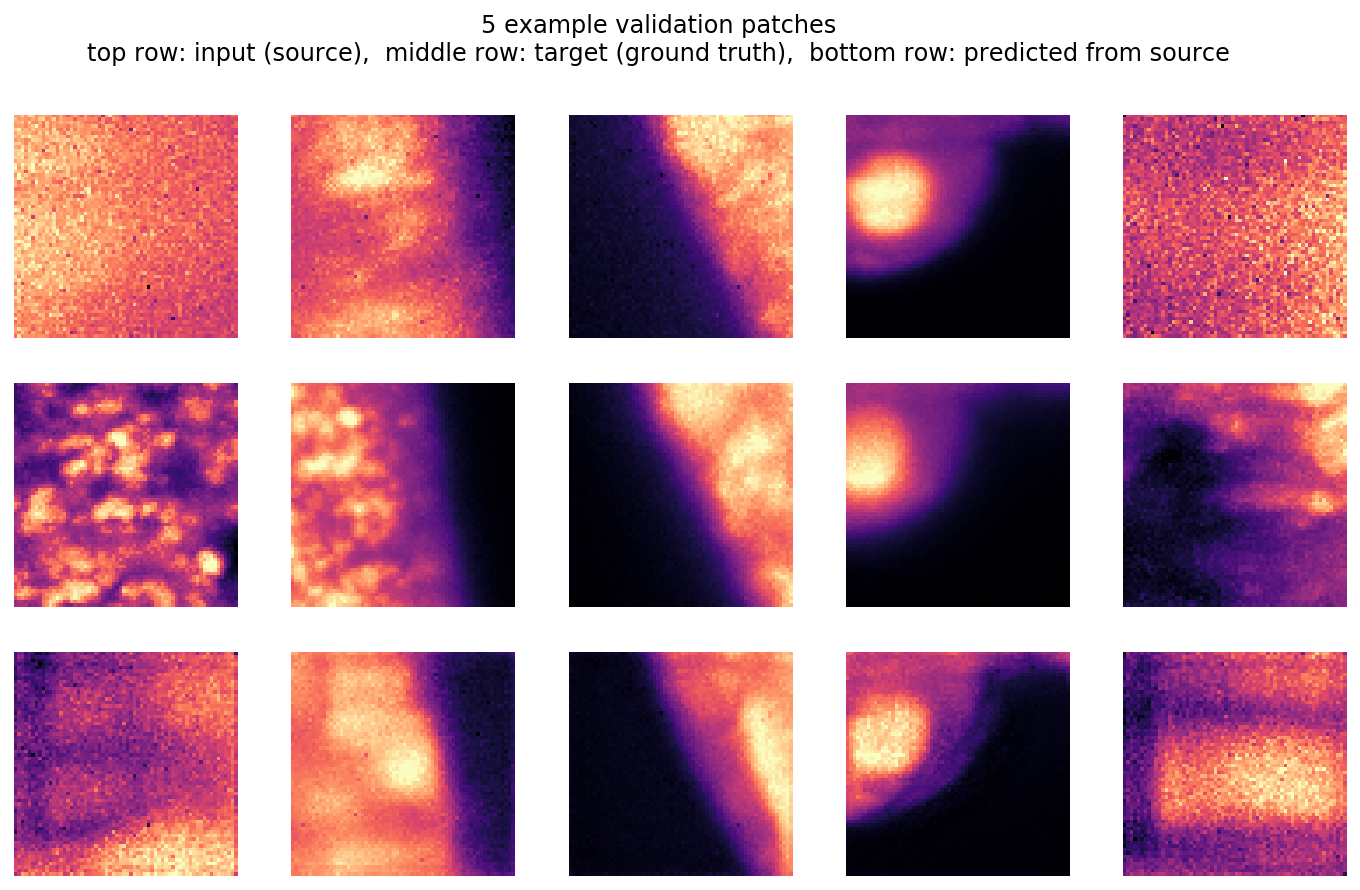

In [9]:
plt.figure(figsize=(12,7))
_P = model.keras_model.predict(X_val[:5])
if config.probabilistic:
    _P = _P[...,:(_P.shape[-1]//2)]
plot_some(X_val[:5],Y_val[:5],_P,pmax=99.5)
plt.suptitle('5 example validation patches\n'      
             'top row: input (source),  '          
             'middle row: target (ground truth),  '
             'bottom row: predicted from source');

In [10]:
model.export_TF()



Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: C:\Users\SPENCE~1\AppData\Local\Temp\tmpyvn6g6am\model\saved_model.pb

Model exported in TensorFlow's SavedModel format:
C:\Users\Spencer Du\Documents\MSc Computing with placement Cardiff Uni\Placement\Machine learning for imaging project\models\my_model\TF_SavedModel.zip
